<a href="https://colab.research.google.com/github/MammadovN/Machine_Learning/blob/main/projects/01_supervised/regression/linear_regression/housing_price_prediction/housing_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vikrishnan/boston-house-prices")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/boston-house-prices


In [54]:
# Importing necessary libraries
import pandas as pd

# Define the dataset path
dataset_path = '/kaggle/input/boston-house-prices/housing.csv'

# Define column names based on the Boston Housing dataset
column_names = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX",
    "PTRATIO", "B", "LSTAT", "MEDV"
]

# Load the dataset into a pandas DataFrame
data = pd.read_csv(dataset_path, sep='\s+', names=column_names)

# Display the first few rows of the dataset to verify the data
data.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [55]:
# Separating features (X) and target variable (y)
X = data.drop('MEDV', axis=1)  # All columns except for 'MEDV' are considered as features
y = data['MEDV']  # 'MEDV' is the target variable, representing the house prices


In [56]:
# Importing train_test_split from sklearn for splitting the data
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Displaying the size of the training and test sets
print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")


Training set size: (404, 13)
Test set size: (102, 13)


In [57]:
# Importing the LinearRegression model from sklearn
from sklearn.linear_model import LinearRegression

# Initializing the Linear Regression model
model = LinearRegression()

# Training the model using the training data
model.fit(X_train, y_train)

# Printing a message indicating the model has been trained
print("Model has been trained!")


Model has been trained!


In [58]:
# Importing mean_squared_error and r2_score from sklearn.metrics to evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

# Making predictions on the test data
y_pred = model.predict(X_test)

# Calculating the model's performance metrics
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R^2 Score

# Printing the evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error (MSE): 24.291119474973478
R^2 Score: 0.6687594935356326


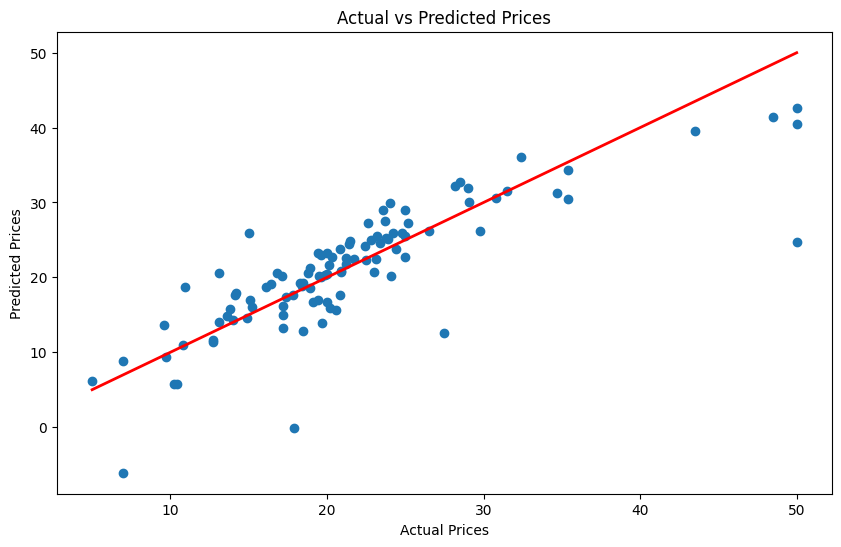

In [59]:
# Importing matplotlib for visualization
import matplotlib.pyplot as plt

# Visualizing the actual prices vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)  # Scatter plot of actual vs predicted values
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)  # Adding a line representing perfect predictions
plt.xlabel("Actual Prices")  # Label for the x-axis
plt.ylabel("Predicted Prices")  # Label for the y-axis
plt.title("Actual vs Predicted Prices")  # Title of the plot
plt.show()  # Display the plot
